### Intro

In [1]:
import os
import param
import xarray as xr
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import matplotlib.pyplot as plt
from cartopy import crs  # crs = coordinate reference system
from cartopy import feature as cf
from geoviews import feature as gf
from bokeh.models import WMTSTileSource
from bokeh.tile_providers import STAMEN_TERRAIN, STAMEN_TONER

In [2]:
data_dir = os.path.join(os.getcwd(), 'data')
print(data_dir)

/home/jack/Repos/geopython-basel/data


HoloViews (and GeoViews) plots can be plotted by using either a Matplotlib backend or a Bokeh backend.


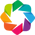

In [3]:
hv.notebook_extension('bokeh', 'matplotlib')

You have to choose exactly one plotting backend.

Matplotlib supports more projections, but less interactivity.

Bokeh supports only the Mercator projection, but offers better interactivity.

In [4]:
%output backend='matplotlib'

GeoViews is a Python library that makes it easy to explore and visualize geographical, meteorological, oceanographic datasets.

GeoViews is built on the HoloViews library.

GeoViews adds a family of geographic plot types, transformations, and primitives based primarily on the Cartopy library.

GeoViews objects are just like HoloViews objects, except that they have an associated geographic projection based on one of the Coordinate Reference Systems defined in `cartopy.crs`.

:Layout
   .Coastline.I :Feature   [Longitude,Latitude]
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Overlay.I   :Overlay
      .Coastline.I :Feature   [Longitude,Latitude]
      .Ocean.I     :Feature   [Longitude,Latitude]
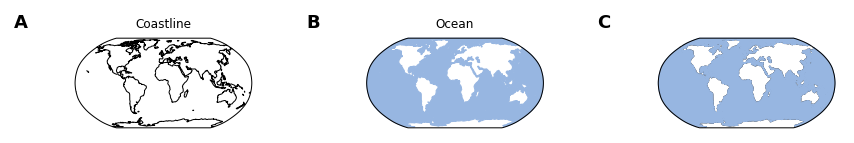

In [5]:
%%opts Feature [projection=crs.Robinson()]
gf.coastline + gf.ocean + gf.coastline * gf.ocean

See [How to customize plots](http://holoviews.org/user_guide/Customizing_Plots.html) in the HoloViews documentation.

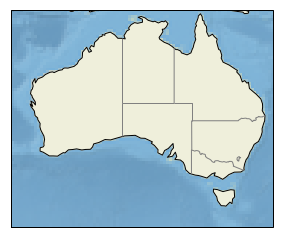

In [6]:
ax = plt.axes(projection=crs.PlateCarree())
ax.set_extent([110, 155, -10, -45])

# add background image for nice sea rendering
ax.stock_img()

# Cartopy feature from Natural Earth
states_provinces = cf.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE)
# ax.add_feature(cf.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')

plt.show()

In [7]:
%%time
df = pd.read_csv('data/2014_us_cities.csv').sort_values(by='pop')

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.6 ms


In [8]:
df.tail()

name      pop        lat         lon
4  Philadelphia   1539313  39.952335  -75.163789
3       Houston   2129784  29.758938  -95.367697
2       Chicago   2705627  41.875555  -87.624421
1   Los Angeles   3826423  34.053717 -118.242727
0      New York   8287238  40.730599  -73.986581

In [9]:
# Coordinate system aware version of a HoloViews dataset
cities_ds = gv.Dataset(data=df, kdims=['lat', 'lon'])

In [10]:
cities_ds.crs


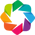

In [11]:
hv.notebook_extension('bokeh')

In [15]:
tiles = {
    'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
    'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
    'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'),
    'STAMEN_TONER': STAMEN_TONER,
    'STAMEN_TERRAIN': STAMEN_TERRAIN}

In [42]:
%%output size=200
tile_geo = gv.WMTS(tiles['STAMEN_TERRAIN'],crs=crs.GOOGLE_MERCATOR)
# click on the "Wheel Zoom" tool and zoom out
tile_geo

:WMTS   [Longitude,Latitude]

In [43]:
%%output size=200
# %%opts Points [tools=['hover'] size_index=2 color_index=2 xaxis=None yaxis=None]
# %%opts Points [width=600 height=550 tools=['hover'] color_index='pop'] ('color': 'red')
cities_points = cities_ds.to(gv.Points, groupby='pop', dynamic=True)
gv.WMTS(tiles['ESRI']) * cities_points

:DynamicMap   [pop]

### What is a Cartopy feature?

Documentation for the [Cartopy Feature interface](http://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html).

In [44]:
?crs

A Cartopy `Feature` represents a collection of points, lines and polygons with convenience methods for common drawing and filtering operations.

In particular, `NaturalEarthFeature` provides a simple interface to [Natural Earth](http://www.naturalearthdata.com/) shapefiles.

For example, in `cartopy.feature.py` we can find `OCEAN`, an instance of the `NaturalEarthFeature` class.

In [45]:
OCEAN = cf.NaturalEarthFeature(category='physical',
                            name='ocean',
                            scale='110m',
                            edgecolor='face',
                            facecolor=cf.COLORS['water'])
OCEAN

`scale` is the dataset scale, i.e. one of '10m', '50m', or '110m'.

Corresponding to 1:10,000,000, 1:50,000,000, and 1:110,000,000 respectively.

In [46]:
type(OCEAN)

cartopy.feature.NaturalEarthFeature

In [47]:
?cf.NaturalEarthFeature

In [48]:
OCEAN.crs

As you can see, a cartopy `NaturalEarthFeature` instance has a coordinate reference system `crs`.

The default CRS is the [plate carrée projection](https://en.wikipedia.org/wiki/Equirectangular_projection).

In [49]:
??gv.Feature

### What is a GeoViews feature?

In [64]:
hv.notebook_extension('matplotlib')

A GeoViews `Feature` is a Cartopy feature with additional properties and methods.

In [65]:
gvFeature = gv.Feature(data=cf.OCEAN, group='Ocean')

:Feature   [Longitude,Latitude]
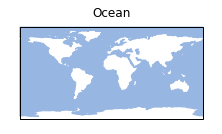

In [66]:
gvFeature

In [67]:
dir(gvFeature)

['_Dimensioned__abstract',
 '_Dimensioned__params',
 '_Element2D__params',
 '_Element__params',
 '_Feature__params',
 '_LabelledData__params',
 '_Parameterized__db_print',
 '_Parameterized__generate_name',
 '_Parameterized__params',
 '_ViewableElement__abstract',
 '_ViewableElement__params',
 '__Element__params',
 '__GeoFeature__params',
 '__add__',
 '__bool__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abstract',
 '_add_parameter',
 '_auxiliary_component',
 '_cached_constants',
 '_cdims_param_value',
 '_crs_param_value',
 '_deep_indexable',

Again, if not specified, the default CRS is the plate carrée projection.

In [68]:
gvFeature.crs

There is a handful of predefined features in `geoviews.feature.py`.

In [69]:
dir(gf)

['Feature',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'borders',
 'cf',
 'coastline',
 'lakes',
 'land',
 'ocean',
 'rivers']

:Feature   [Longitude,Latitude]
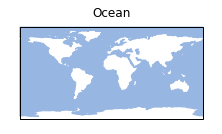

In [70]:
gf.ocean

You can use `gf.ocean` as a shortcut for the `gv.Feature(cf.OCEAN, group='Ocean')`

:Layout
   .Ocean.I :Feature   [Longitude,Latitude]
   .Land.I  :Feature   [Longitude,Latitude]
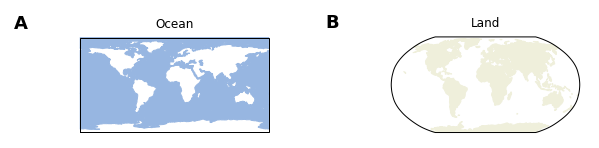

In [71]:
gf.ocean + gf.land

:Overlay
   .Land.I      :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
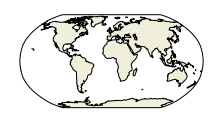

In [72]:
%%opts Feature [projection=crs.Robinson()]
gf.land * gf.coastline

:Overlay
   .Land.I      :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
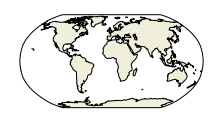

In [73]:
hv.Overlay([gf.land, gf.coastline])

### Change geographical projection

You can use the `opts` magic command to change the geographical projection. `opts` is not a built-in magic command, it's provided by HoloViews.

See `OptsMagic` class in `holoviews.ipython.magics.py` and `OptsSpec` in `holoviews.util.parser`.

In [74]:
%opts?

Use the [Robinson projection](https://en.wikipedia.org/wiki/Robinson_projection).

In [75]:
%opts Feature [projection=crs.Robinson()]

:Feature   [Longitude,Latitude]
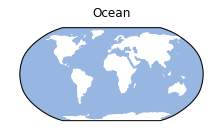

In [76]:
gf.ocean

### Mix & Match

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
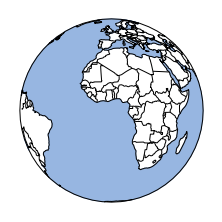

In [83]:
%opts Feature [projection=crs.Mercator()]
gf.ocean * gf.coastline * gf.borders

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
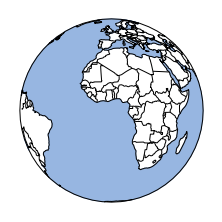

In [84]:
%%opts Feature [projection=crs.Geostationary()]
gf.ocean * gf.coastline * gf.borders

### Graticules

In `geoviews.feature.py` there isn't a feature for [graticules](http://desktop.arcgis.com/en/arcmap/10.3/map/page-layouts/what-are-grids-and-graticules-.htm). But you can create them by yourself.

First, create a cartopy feature.

In [85]:
cartopyGraticules = cf.NaturalEarthFeature(category='physical', name='graticules_30',scale='110m')

Then, use it to create a GeoViews feature.

**TODO:** I have no idea what the valid values for `group` are...

In [86]:
%%opts Feature.Lines (facecolor='none' edgecolor='gray') [projection=crs.Geostationary()]
# %%opts Feature [projection=crs.Geostationary()]
graticules = gv.Feature(cartopyGraticules, group='Lines')

In [87]:
%%opts?

:Feature   [Longitude,Latitude]
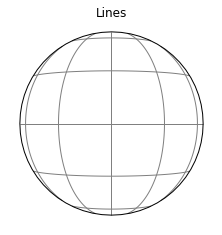

In [88]:
graticules

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
   .Rivers.I    :Feature   [Longitude,Latitude]
   .Lakes.I     :Feature   [Longitude,Latitude]
   .Lines.I     :Feature   [Longitude,Latitude]
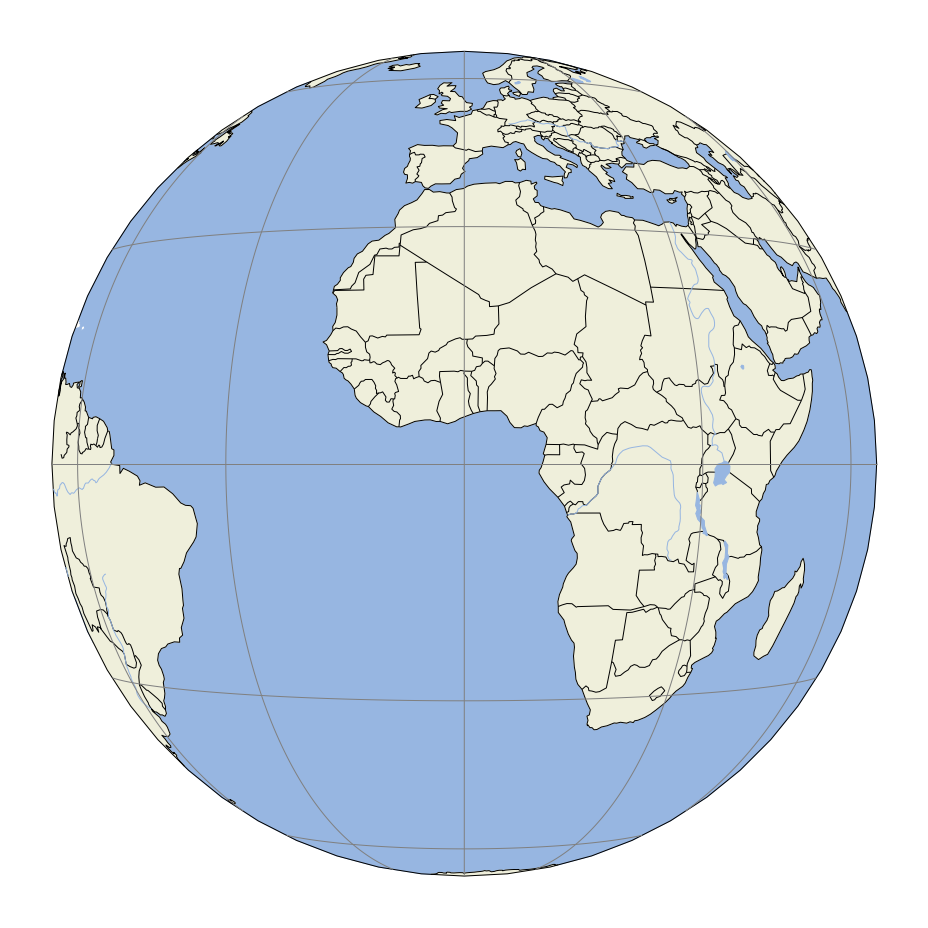

In [89]:
%%opts Feature [projection=crs.Geostationary()]
%%output size=450
features = hv.Overlay([gf.ocean, gf.land, gf.coastline, gf.borders, gf.rivers, gf.lakes, graticules])
features

### TODO


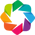

In [95]:
hv.notebook_extension('bokeh')

In [96]:
%%opts Image [colorbar=True fig_size=400 xaxis=None yaxis=None] (cmap='viridis')
ds_air = xr.open_dataset('./data/air.mon.mean.nc')

In [97]:
dataset = gv.Dataset(ds_air, label=ds_air.attrs['title'])
dataset.data

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 840)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    air      (time, lat, lon) float64 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [98]:
img_air = dataset.to(gv.Image, ['lon', 'lat'], dynamic=True)

In [99]:
img_air * gf.borders() * gf.coastline()

:DynamicMap   [time]

In [100]:
%%opts WMTS [width=450 height=250 xaxis=None yaxis=None]
hv.NdLayout({name: gv.WMTS(wmts, extents=(0, -90, 360, 90), crs=crs.PlateCarree())
            for name, wmts in tiles.items()}, kdims=['Source']).cols(2)

:NdLayout   [Source]
   :WMTS   [Longitude,Latitude]